# AR(p)過程の性質を調べる 

In [1]:
%matplotlib inline

import arch
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans'
import matplotlib.pyplot as plt
import seaborn as sns

## AR(p)過程

自己相関がある時系列データの最もシンプルなモデルの一つ。自己相関とは、ある時刻（ステップ）におけるデータ値が過去の時刻（ステップ）における自分自身の値と相関すること。データ系列を$\mathbf{Y} = \{ y_{0}, y_{1}, ..., y_{t} \}$とすると、AR(1)過程は

$$
y_{t} = c + \varphi_{1} y_{t-1} + \varepsilon_{t}\ , ~~~~ \varepsilon_{t} \sim W.N.(\sigma^{2})
$$

となる。

AR(p)過程は

$$
y_{t} = c + \varphi_{1} y_{t-1} + \varphi_{2} y_{t-2} + ... + \varphi_{p} y_{t-p} + \varepsilon_{t}\ , ~~~~ \varepsilon_{t} \sim W.N.(\sigma^{2})
$$

となる。

## 単純なAR(1)過程の性質

以下の単純なAR(1)過程を考える。

$$
y_{t} = \varphi_{1} y_{t-1} + \varepsilon_{t}\ , ~~~~ \varepsilon_{t} \sim W.N.(\sigma^{2})
$$

パラメータは$\varphi_{1}$のみ。このとき、$|\varphi_{1}|$が1より小さいとき、1の時、1より大きい時でそれぞれ性質が異なる。
以下、ホワイトノイズとして標準正規分布に従う乱数を使う。

### $|\varphi_{1}| < 1$の時

時間と共に$y_{t}$は0に収束する（ただしホワイトノイズに従う撹乱項があるためノイズは常に発生し続ける）。定常過程と呼ばれる。

### $|\varphi_{1}| = 1$の時

単位根過程と呼ばれる。時間と共に発散するが、定常過程と区別がつきにくい場合がある。

### $|\varphi_{1}| > 1$の時

発散する。

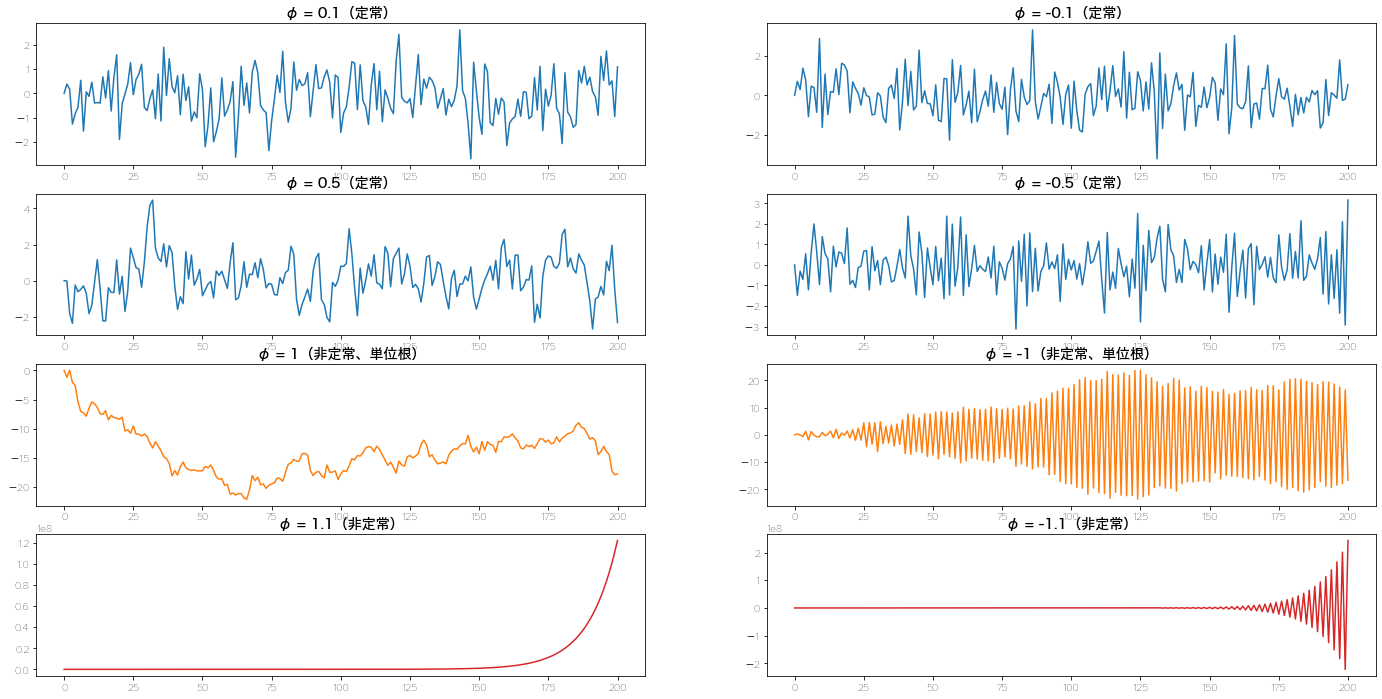

In [26]:
# 上記のAR(1)過程に従って次の時刻のサンプルを生成する
def ar1_process(y, phi1, epsilon):
    return phi1 * y + epsilon

def ar1_process_n_step(n, phi1, initial_val, white_noise):
    ys = [initial_val]
    y_prev = initial_val
    for _ in range(n):
        y = ar1_process(y_prev, phi1, white_noise())
        ys.append(y)
        y_prev = y

    return np.array(ys)

# 初期値を0としたときのAR(1)過程の例（200ステップ）
xs = np.arange(201)
ys01 = ar1_process_n_step(200, 0.1, 0, np.random.normal)
ys01m = ar1_process_n_step(200, -0.1, 0, np.random.normal)
ys05 = ar1_process_n_step(200, 0.5, 0, np.random.normal)
ys05m = ar1_process_n_step(200, -0.5, 0, np.random.normal)
ys10 = ar1_process_n_step(200, 1, 0, np.random.normal)
ys10m = ar1_process_n_step(200, -1, 0, np.random.normal)
ys11 = ar1_process_n_step(200, 1.1, 0, np.random.normal)
ys11m = ar1_process_n_step(200, -1.1, 0, np.random.normal)

ys_list = [ys01, ys01m, ys05, ys05m, ys10, ys10m, ys11, ys11m]
title_list = ['φ = 0.1（定常）', 'φ = -0.1（定常）',
              'φ = 0.5（定常）', 'φ = -0.5（定常）',
              'φ = 1（非定常、単位根）', 'φ = -1（非定常、単位根）',
              'φ = 1.1（非定常）', 'φ = -1.1（非定常）']
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:red', 'tab:red']


fig, ax = plt.subplots(4, 2, figsize=(24, 12))
for i in range(4):
    for j in range(2):
        idx = i*2+j
        ax[i, j].plot(xs, ys_list[idx], color=colors[idx])
        ax[i, j].set_title(title_list[idx], fontsize=14, fontweight='semibold')